<a href="https://colab.research.google.com/github/AnabelleSouza/CRUD_PDO-CONTEINER/blob/main/rice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
pip install ucimlrepo

In [21]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'ID': 276, 'type': 'NATIVE', 'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'venue': 'International Journal of Intel

In [22]:
# # Verifique se 'y' foi carregado corretamente como uma série
print(X.shape)
print(y.shape)

# # Certifique-se de que y está no formato correto (1D)
y = y.squeeze()

# # Verifique novamente o formato de y
print(y.shape)

(3810, 7)
(3810, 1)
(3810,)


In [23]:


# Verifique as colunas que são categóricas
categorical_columns = X.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder para transformar categorias em números
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Verifique se todas as colunas foram transformadas
print(X.head())


    Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987         193.337387          87.448395      0.891861   
4  14688  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent  
0        15617  0.572896  
1        15072  0.615436  
2        14954  0.693259  
3        13368  0.640669  
4        15262  0.646024  


In [24]:
# Verificar as primeiras linhas dos dados e das classes
print(X.head())
print(y.head())


    Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987         193.337387          87.448395      0.891861   
4  14688  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent  
0        15617  0.572896  
1        15072  0.615436  
2        14954  0.693259  
3        13368  0.640669  
4        15262  0.646024  
0    Cammeo
1    Cammeo
2    Cammeo
3    Cammeo
4    Cammeo
Name: Class, dtype: object


In [25]:
# Verificar os nomes das colunas no dataset
print(X.columns)


Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent'],
      dtype='object')


In [26]:
import pymc as pm
import numpy as np
import arviz as az

In [27]:
# Definir as coordenadas das features usando os nomes das colunas
cols = list(X.columns)
coords = {'features': cols}

# Exibir as coordenadas para conferência
print(coords)


{'features': ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']}


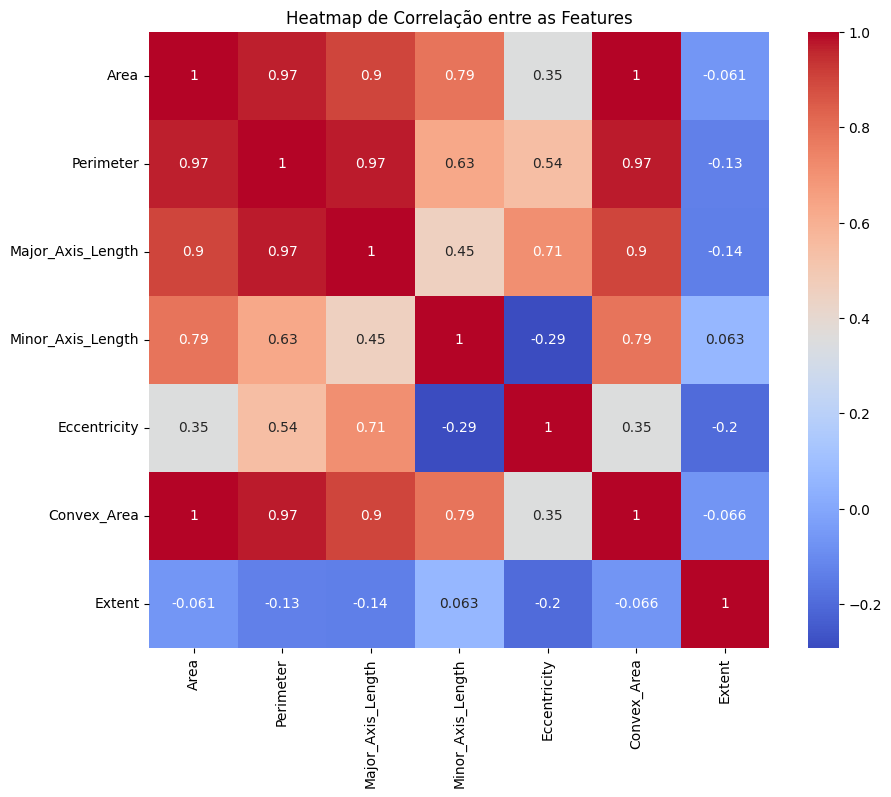

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir as coordenadas das features usando os nomes das colunas
cols = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
        'Eccentricity', 'Convex_Area', 'Extent']

# Plotando o heatmap de correlação entre as features
plt.figure(figsize=(10, 8))
correlation_matrix = X[cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap de Correlação entre as Features')
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando (escalando) as features de X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converter as classes para valores binários (0 e 1)
y_train = y_train.replace({'Cammeo': 1, 'Osmancik': 0})
y_test = y_test.replace({'Cammeo': 1, 'Osmancik': 0})

# Preencher valores nulos em y_train com a moda (classe mais frequente), se necessário
y_train = y_train.fillna(y_train.mode()[0])


In [30]:
y_train = y_train.replace({'Cammeo': 1, 'Osmancik': 0})
y_test = y_test.replace({'Cammeo': 1, 'Osmancik': 0})

In [31]:
# Verificar se a conversão foi bem-sucedida
print(y_train.unique())

[0 1]


In [32]:
# Verificar os valores únicos para garantir que estão binários
print(y_train.unique())
print(y_test.unique())


[0 1]
[1 0]


In [33]:
# Preencher valores nulos com a classe mais frequente (mode)
y_train = y_train.fillna(y_train.mode()[0])


In [34]:


# Definir o modelo com X e y como variáveis compartilhadas
with pm.Model() as rice_model:
    X_shared = pm.Data('X', X_train_scaled)
    y_shared = pm.Data('y', y_train)  # y_train agora é binário (0 para Osmancik, 1 para Cammeo)

    # Priori para os pesos e bias
    priors = pm.Normal('w', mu=0, sigma=1, shape=X_train_scaled.shape[1])
    bias = pm.Normal('bias', mu=0, sigma=1)

    # Logits
    logits = pm.math.dot(X_shared, priors) + bias

    # Likelihood (Bernoulli) para a classe observada
    likelihood = pm.Bernoulli('likelihood', logit_p=logits, observed=y_shared)

    # Amostragem do posterior
    trace = pm.sample(1000, tune=1000, target_accept=0.95)

# Sumário do trace
pm.summary(trace)


Output()

Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bias,-0.861,0.099,-1.047,-0.685,0.003,0.002,1446.0,1581.0,1.0
w[0],0.013,0.743,-1.414,1.398,0.019,0.017,1600.0,1145.0,1.0
w[1],0.956,0.565,-0.144,1.911,0.012,0.011,2230.0,1462.0,1.0
w[2],0.989,0.741,-0.439,2.352,0.020,0.016,1379.0,1192.0,1.0
w[3],-0.539,0.662,-1.786,0.721,0.020,0.015,1088.0,842.0,1.0
w[4],1.094,0.584,-0.029,2.206,0.018,0.013,1052.0,989.0,1.0
w[5],2.384,0.806,0.779,3.845,0.021,0.015,1555.0,1412.0,1.0
w[6],0.055,0.079,-0.099,0.197,0.002,0.002,2001.0,1439.0,1.0


In [35]:
with rice_model:
    prior_samples = pm.sample_prior_predictive()

In [36]:
# Verificar o conteúdo dentro do grupo 'prior'
print(prior_samples['prior'].keys())


KeysView(<xarray.Dataset> Size: 36kB
Dimensions:  (chain: 1, draw: 500, w_dim_0: 7)
Coordinates:
  * chain    (chain) int64 8B 0
  * draw     (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * w_dim_0  (w_dim_0) int64 56B 0 1 2 3 4 5 6
Data variables:
    bias     (chain, draw) float64 4kB -1.455 -1.445 0.8511 ... -1.156 1.06
    w        (chain, draw, w_dim_0) float64 28kB -0.8354 0.5004 ... 0.2525
Attributes:
    created_at:                 2024-09-25T12:09:55.227537+00:00
    arviz_version:              0.19.0
    inference_library:          pymc
    inference_library_version:  5.16.2)


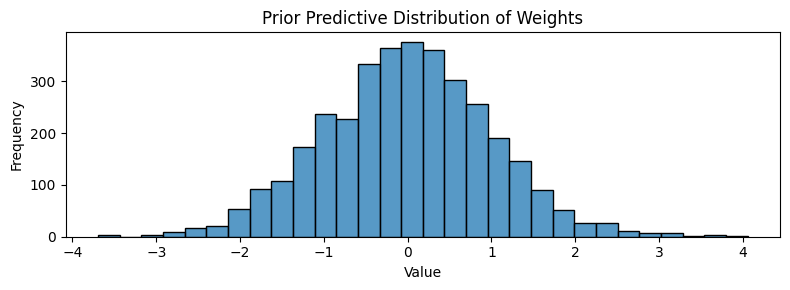

In [37]:

# Acessar as amostras da prior preditiva para os pesos 'w'
prior_samples_w = prior_samples['prior']['w'].values  # Extraímos os valores de 'w'

# Achatar as amostras para facilitar a plotagem
prior_samples_flat = prior_samples_w.flatten()

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 3))

# Plotar o histograma das amostras da prior preditiva
sns.histplot(data=prior_samples_flat, bins=30, kde=False, ax=ax)

# Adicionar título e rótulos
ax.set_title("Prior Predictive Distribution of Weights")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


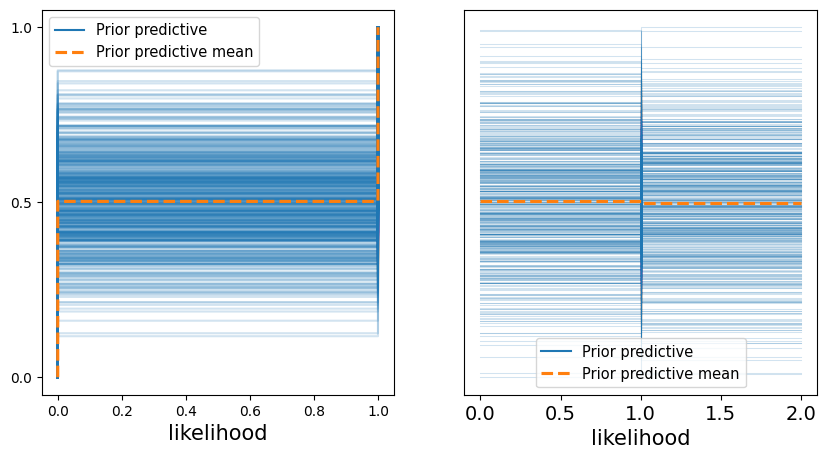

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

az.plot_ppc(prior_samples, group='prior', kind='cumulative',ax=axes[0]);
az.plot_ppc(prior_samples, group='prior',ax=axes[1]);


In [40]:

with rice_model:
  #approx = pm.fit(2000)
  trace = pm.sample(20000)

Output()

Output()

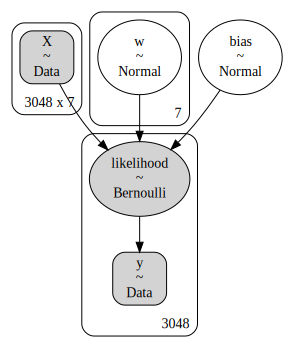

In [41]:

pm.model_to_graphviz(rice_model)

In [42]:

pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bias,-0.859,0.097,-1.039,-0.673,0.001,0.000,29552.0,28843.0,1.0
w[0],0.015,0.781,-1.462,1.466,0.005,0.004,28801.0,27047.0,1.0
w[1],0.965,0.577,-0.110,2.060,0.003,0.002,37013.0,28788.0,1.0
w[2],1.004,0.764,-0.411,2.471,0.004,0.003,32044.0,27632.0,1.0
w[3],-0.548,0.650,-1.718,0.719,0.005,0.003,20575.0,24171.0,1.0
w[4],1.081,0.577,-0.015,2.139,0.004,0.003,21161.0,23894.0,1.0
w[5],2.375,0.824,0.815,3.906,0.005,0.003,31883.0,28373.0,1.0
w[6],0.054,0.078,-0.093,0.201,0.000,0.000,47794.0,28025.0,1.0


array([[<Axes: title={'center': 'bias'}>,
        <Axes: title={'center': 'bias'}>],
       [<Axes: title={'center': 'w'}>, <Axes: title={'center': 'w'}>]],
      dtype=object)

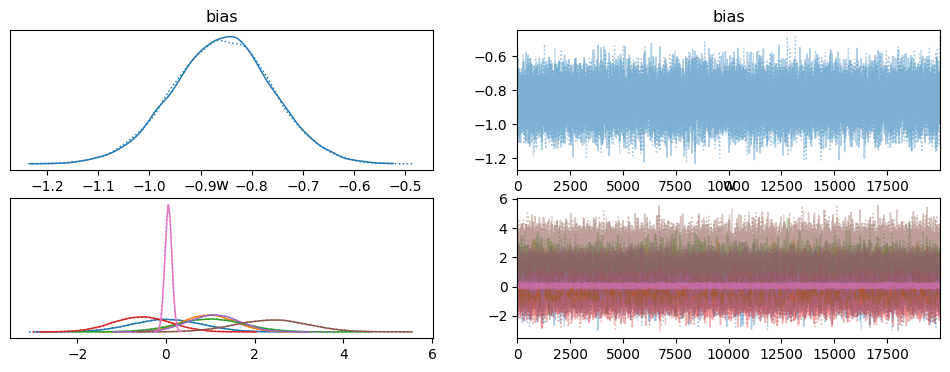

In [43]:

az.plot_trace(trace)

In [44]:
with rice_model:
    pm.set_data({"X": X_test_scaled, "y": y_test.values})

    # Generate posterior predictive samples, including 'likelihood'
    trace_post = pm.sample_posterior_predictive(trace, var_names=['w', 'bias', 'likelihood'])

Output()

In [45]:
# Verificar o conteúdo dentro de 'posterior_predictive'
print(trace_post['posterior_predictive'].keys())


KeysView(<xarray.Dataset> Size: 247MB
Dimensions:           (chain: 2, draw: 20000, likelihood_dim_2: 762, w_dim_2: 7)
Coordinates:
  * chain             (chain) int64 16B 0 1
  * draw              (draw) int64 160kB 0 1 2 3 4 ... 19996 19997 19998 19999
  * likelihood_dim_2  (likelihood_dim_2) int64 6kB 0 1 2 3 4 ... 758 759 760 761
  * w_dim_2           (w_dim_2) int64 56B 0 1 2 3 4 5 6
Data variables:
    bias              (chain, draw) float64 320kB -0.5026 0.5068 ... -1.283 0.21
    likelihood        (chain, draw, likelihood_dim_2) int64 244MB 0 0 1 ... 1 1
    w                 (chain, draw, w_dim_2) float64 2MB 0.3484 ... 0.1421
Attributes:
    created_at:                 2024-09-25T12:25:25.696814+00:00
    arviz_version:              0.19.0
    inference_library:          pymc
    inference_library_version:  5.16.2)


In [46]:
mean_likelihood = trace_post.posterior_predictive["likelihood"].mean(dim=["chain", "draw"])
binary_predictions = (mean_likelihood > 0.5).astype(int)

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, binary_predictions)

recall = recall_score(y_test, binary_predictions)

f1 = f1_score(y_test, binary_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.4405
Recall: 0.6771
F1 Score: 0.5338
